In [1]:
import random
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

ROOT_DIR = '..'
sys.path.append(ROOT_DIR)

In [3]:
from utils.evolution_functions import next_generation
from utils.plot_utils import plot_all
from utils.statistic_utils import run_chi_squared_test

In [4]:
def generate_random_samples(p, q, N):
    values = [p**2 * N, 2*p*q*N, q**2 * N]
    return values

# Mutação Recorrente

1. Uma população de capivaras apresenta alelos para coloração dos pêlos do focinho:
dominante A (marrom) e recessivo a (branco). Em uma análise inicial, foi observado que em
uma amostra de 100 animais, 64 apresentavam cor marrom e 36 apresentaram coloração
branca. Os cientistas decidiram monitorar essa população ao longo de 10 gerações e
incluíram a possibilidade de mutação bidirecional para o locus em questão. Ensaios de
replicação mostraram que a taxa de mutação do alelo A para o alelo a é de 0,01 e do alelo a
para o alelo A é de 0,001.

Simule as frequências alélicas e genotípicas da população ao longo de 10 gerações e teste
se a população está em equilíbrio de Hardy-Weinberg em cada geração.
Plote um gráfico mostrando as frequências dos alelos A e a ao longo das 10 gerações e
indique se há alguma tendência observada. Agora estenda para 100 gerações.

 p inicial, 0.4, q inicial, 0.6
It is NOT in Hardy-Weinberg equilibrium in generation 17
Final p: 0.1943087483608113, Final q: 0.8056912516391881


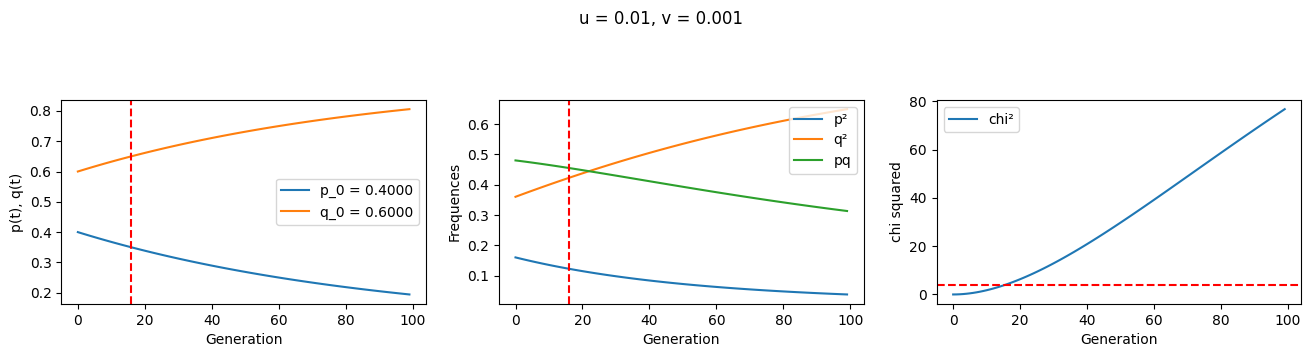

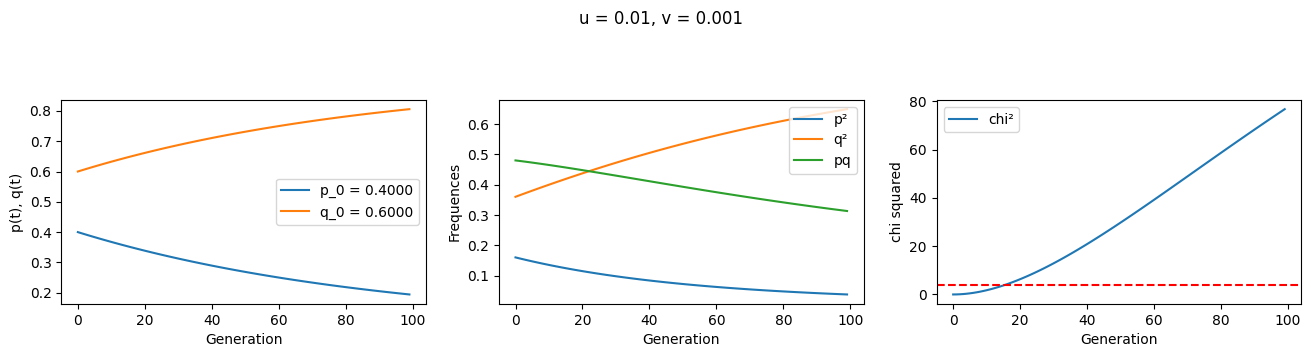

In [7]:
N = 100 * 2

u_list = [0.01]
v_list = [0.001]
# p0_list = [(64 * 2)/N]
#q0 = 0.72
q2 = 0.36
q0_list = [np.sqrt(q2)]
p0_list = [1 - p0 for p0 in q0_list]
# q0_list = [1 - p0 for p0 in p0_list]
# v_list = [1e-4, 1e-3, 1e-2, 1e-1]

t = np.arange(100)
precision = 10

n = 1 # Graus de Liberdade

estag_gens = {}
eq_gens = {}
gen_loss = {}
ehw_gens = {}

# EHW é P0 e Q0, por isso, precisamos comparar os valores obtidos com os valores iniciais
# Utilizando o chi squared

for u in u_list:
    for v in v_list:
        p_t_list = []
        q_t_list = []
        p2_t_list = []
        q2_t_list = []
        pq_t_list = []
        chi_squared_list = []
        for k, p0 in enumerate(p0_list):
            q0 = q0_list[k]

            p_t = [p0]
            q_t = [q0]
            p2_t = [p0 ** 2]
            q2_t = [q0 ** 2]
            pq_t = [2 * p0 * q0]
            chi_squared = [0]

            expected = generate_random_samples(p0, q0, N)
            # expected = [p0**2 * N, 2*p0*q0*N, q0**2 * N]

            dict_key = f"u={u}, v={v}, Pop={p0:.4f}x{q0:.4f}"
            print(f" p inicial, {p0}, q inicial, {q0}")
            for i in t:
                if i == 0:
                    continue

                p, q = next_generation(p_t[i-1], q_t[i-1], u, v)

                if round(p, precision) == round(q, precision) and not eq_gens.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    eq_gens[dict_key] = i

                if round(p, precision) == round(p_t[i-1], precision) and not estag_gens.get(dict_key, None):
                    print(f"Gen {i} p: {p} p ant: {p_t[i-1]}")
                    estag_gens[dict_key] = i

                p2 = p ** 2
                q2 = q ** 2
                pq = 2 * p * q

                # ehw = p**2 + 2*p*q + (q)**2
                # if ehw != 1:
                #     print(f"Gen {i} Não em EHW")

                observed = generate_random_samples(p, q, N)
                # observed = [p**2 * N, 2*p*q*N, q**2 * N]
                chi_2, is_correlated = run_chi_squared_test(observed, expected, n)
                if not is_correlated and not ehw_gens.get(dict_key, None):
                    print(f'It is NOT in Hardy-Weinberg equilibrium in generation {i + 1}')
                    ehw_gens[dict_key] = i

                # Verify genetic loss
                if int(pq * N) == 0 and not gen_loss.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    print(f"Gen {i} with genetic loss for p: {p} q: {q}")
                    gen_loss[dict_key] = i

                # Add chi squared

                # print(f"Gen {i} p: {p} q: {q}")
                p_t.append(p)
                q_t.append(q)
                p2_t.append(p2)
                q2_t.append(q2)
                pq_t.append(pq)
                chi_squared.append(chi_2)

            p_t_list.append(p_t)
            q_t_list.append(q_t)
            p2_t_list.append(p2_t)
            q2_t_list.append(q2_t)
            pq_t_list.append(pq_t)
            chi_squared_list.append(chi_squared)


            print(f"Final p: {p_t[-1]}, Final q: {q_t[-1]}")
            plot_all(t, [p_t], [q_t], [p2_t], [q2_t], [pq_t], [chi_squared], [p0], [q0], u, v, gen_ehw=ehw_gens.get(dict_key, None))
        # plot_n_pt(t, p_t_list, p0_list, u, v)

        plot_all(t, p_t_list, q_t_list, p2_t_list, q2_t_list, pq_t_list, chi_squared_list, p0_list, q0_list, u, v)
        # For each p value do the plot in a subplot
        # plot_n_pt_qt(t, p_t_list, q_t_list, p0_list, q0_list, u, v)
        # plot_n_p2_q2_pq(t, p2_t_list, q2_t_list, pq_t_list, p0_list, q0_list, u, v)

        # plot_pt(t, p_t, p0)
        # plot_pt(t, q_t, q0)

        # plot_pt_qt(t, p_t, q_t, p0, q0)



In [8]:
print("Estagnação")
for key, value in estag_gens.items():
    print(f"Estag Gen {key}: {value}")

print("Equilibrio p=q")
for key, value in eq_gens.items():
    print(f"Eq Gen {key}: {value}")

print("Fim do EHW")
for key, value in ehw_gens.items():
    print(f"EHW Gen {key}: {value}")

print("Perda Genética")
for key, value in gen_loss.items():
    print(f"Gen Loss {key}: {value}")

Estagnação
Equilibrio p=q
Fim do EHW
EHW Gen u=0.01, v=0.001, Pop=0.4000x0.6000: 16
Perda Genética


# Mutação Recorrente

1. Uma população de 1000 indivíduos está em equilíbrio de Hardy-Weinberg para um locus
com dois alelos, A e a, onde a frequência do alelo A é de 0,8 e do alelo a é de 0,2.

Após 5 gerações, a frequência do alelo A caiu para 0,7, enquanto a frequência do alelo a
subiu para 0,3. Sabendo que a taxa de mutação do alelo a para o alelo A é de 0,001,
determine a taxa de mutação do alelo A para o alelo a.

In [11]:
from scipy.optimize import fsolve

def equation(mu):
    p_0 = 0.8
    p_5 = 0.7
    q_0 = 0.2
    nu = 0.001

    sum_geom = 1 + (1 - mu) + (1 - mu)**2 + (1 - mu)**3 + (1 - mu)**4

    return p_5 - (p_0 * (1 - mu)**5 + q_0 * nu * sum_geom)

mu_solution = fsolve(equation, 0.01)

print(f'Taxa de mutação de A para a (mu): {mu_solution[0]}')


Taxa de mutação de A para a (mu): 0.026616727518746643


# Resposta

p1 = p0 - p0 * u + q0 + v

p2 = p1 - p1 * u + q1 + v



 p inicial, 0.8, q inicial, 0.2
It is in Hardy-Weinberg equilibrium in generation 2
It is not in Hardy-Weinberg equilibrium in generation 3
It is not in Hardy-Weinberg equilibrium in generation 4
It is not in Hardy-Weinberg equilibrium in generation 5
Final p: 0.71905774701819, Final q: 0.28094225298181


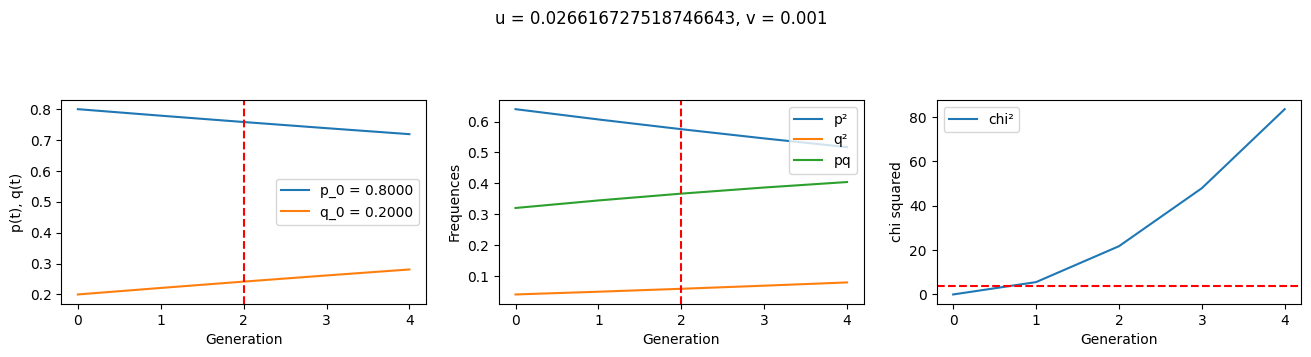

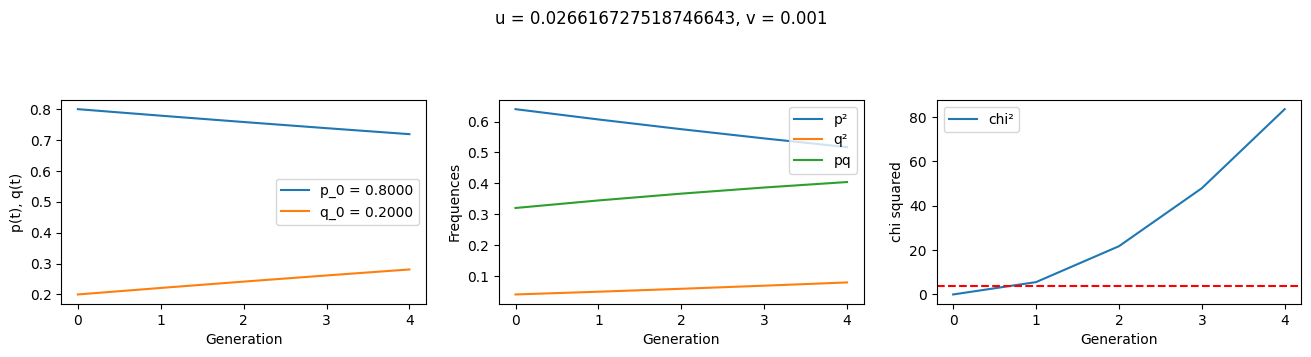

In [14]:
u_list = [mu_solution[0]]
v_list = [0.001]
p0_list = [0.8]
# q0_list = [1 - p0 for p0 in p0_list]
q0_list = [0.2]
# v_list = [1e-4, 1e-3, 1e-2, 1e-1]

#Número de gerações
t = np.arange(5)
precision = 10

N = 1000 #qtde total de indivíduos
n = 3 - 1 # Graus de Liberdade

estag_gens = {}
eq_gens = {}
gen_loss = {}
ehw_gens = {}

# EHW é P0 e Q0, por isso, precisamos comparar os valores obtidos com os valores iniciais
# Utilizando o chi squared

for u in u_list:
    for v in v_list:
        p_t_list = []
        q_t_list = []
        p2_t_list = []
        q2_t_list = []
        pq_t_list = []
        chi_squared_list = []
        for k, p0 in enumerate(p0_list):
            q0 = q0_list[k]

            p_t = [p0]
            q_t = [q0]
            p2_t = [p0 ** 2]
            q2_t = [q0 ** 2]
            pq_t = [2 * p0 * q0]
            chi_squared = [0]

            expected = generate_random_samples(p0, q0, N)

            dict_key = f"u={u}, v={v}, Pop={p0:.4f}x{q0:.4f}"
            print(f" p inicial, {p0}, q inicial, {q0}")
            for i in t:
                if i == 0:
                    continue

                p, q = next_generation(p_t[i-1], q_t[i-1], u, v)

                if round(p, precision) == round(q, precision) and not eq_gens.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    eq_gens[dict_key] = i

                if round(p, precision) == round(p_t[i-1], precision) and not estag_gens.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    estag_gens[dict_key] = i

                p2 = p ** 2
                q2 = q ** 2
                pq = 2 * p * q

                # ehw = p**2 + 2*p*q + (q)**2
                # if ehw != 1:
                #     print(f"Gen {i} Não em EHW")

                observed = generate_random_samples(p, q, N)
                chi_2, is_correlated = run_chi_squared_test(observed, expected, n)
                if is_correlated:
                    print(f'It is in Hardy-Weinberg equilibrium in generation {i + 1}')
                else:
                    print(f'It is not in Hardy-Weinberg equilibrium in generation {i + 1}')

                if not is_correlated and not ehw_gens.get(dict_key, None):
                    ehw_gens[dict_key] = i

                # Verify genetic loss
                if int(pq * N) == 0 and not gen_loss.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    gen_loss[dict_key] = i

                # Add chi squared

                # print(f"Gen {i} p: {p} q: {q}")
                p_t.append(p)
                q_t.append(q)
                p2_t.append(p2)
                q2_t.append(q2)
                pq_t.append(pq)
                chi_squared.append(chi_2)

            p_t_list.append(p_t)
            q_t_list.append(q_t)
            p2_t_list.append(p2_t)
            q2_t_list.append(q2_t)
            pq_t_list.append(pq_t)
            chi_squared_list.append(chi_squared)


            print(f"Final p: {p_t[-1]}, Final q: {q_t[-1]}")
            plot_all(t, [p_t], [q_t], [p2_t], [q2_t], [pq_t], [chi_squared], [p0], [q0], u, v, gen_ehw=ehw_gens.get(dict_key, None))
        # plot_n_pt(t, p_t_list, p0_list, u, v)

        plot_all(t, p_t_list, q_t_list, p2_t_list, q2_t_list, pq_t_list, chi_squared_list, p0_list, q0_list, u, v)
        # For each p value do the plot in a subplot
        # plot_n_pt_qt(t, p_t_list, q_t_list, p0_list, q0_list, u, v)
        # plot_n_p2_q2_pq(t, p2_t_list, q2_t_list, pq_t_list, p0_list, q0_list, u, v)

        # plot_pt(t, p_t, p0)
        # plot_pt(t, q_t, q0)

        # plot_pt_qt(t, p_t, q_t, p0, q0)

In [15]:
print("Estagnação")
for key, value in estag_gens.items():
    print(f"Estag Gen {key}: {value}")

print("Equilibrio p=q")
for key, value in eq_gens.items():
    print(f"Eq Gen {key}: {value}")

print("Fim do EHW")
for key, value in ehw_gens.items():
    print(f"EHW Gen {key}: {value}")

print("Perda Genética")
for key, value in gen_loss.items():
    print(f"Gen Loss {key}: {value}")

Estagnação
Equilibrio p=q
Fim do EHW
EHW Gen u=0.026616727518746643, v=0.001, Pop=0.8000x0.2000: 2
Perda Genética
